Mutual informaiton, a metrics which shows associations between input feature and target. This is a very good way to start on a new problem. Using this metrics a smaller set of high impact features can be identified to work with. Mutual Informaiton is lot like coorelation. However MI detects all kind of relationship vs coorlation which identifies only linear relationship.

MI specifies the association in terms of uncertainity. How uncertainity reduces about one variable if we know the value of another variable. This is known as entropy in information theory.

MI score of 0 shows no association, theoritically MI has no upper bond but practically value above 2 is uncommon. Higher that value higher the association.


Here are some things to remember when applying mutual information:

  * MI can help you to understand the relative potential of a feature as a predictor of the target, considered by itself.
  
  * It's possible for a feature to be very informative when interacting with other features, but not so informative all  alone. MI can't detect interactions between features. It is a univariate metric. In such cases we may have to uncover new features from exisiting features (mostly guided by domain knowledge - example cement). MI should show high association of such new feature with target.
  
  * The actual usefulness of a feature depends on the model you use it with. A feature is only useful to the extent that its relationship with the target is one your model can learn. Just because a feature has a high MI score doesn't mean your model will be able to do anything with that information. You may need to transform the feature first to expose the association. - This is where feature transformation will be helpful.
  




In [1]:
import pandas as pd

df = pd.read_csv("auto.csv")

In [2]:
X = df.copy()
y = X.pop("price")

In [3]:
X.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
dtype: object

In [4]:
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,four,108,mpfi,3.50,2.8,8.8,101,5800,23,29


In [5]:
for column in X.select_dtypes("object"):
    print(column)
    X[column], _ = X[column].factorize()
    


make
fuel-type
aspiration
num-of-doors
body-style
drive-wheels
engine-location
engine-type
num-of-cylinders
fuel-system


In [6]:
for column in X.select_dtypes("object"):
    print(column)
    X[column], _ = X[column].factorize()


In [7]:
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,2,164,0,0,0,0,0,0,0,99.8,...,0,109,0,3.19,3.4,10.0,102,5500,24,30
1,2,164,0,0,0,0,0,1,0,99.4,...,1,136,0,3.19,3.4,8.0,115,5500,18,22
2,1,158,0,0,0,0,0,0,0,105.8,...,1,136,0,3.19,3.4,8.5,110,5500,19,25
3,1,158,0,0,1,0,0,0,0,105.8,...,1,131,0,3.13,3.4,8.3,140,5500,17,20
4,2,192,1,0,0,1,0,2,0,101.2,...,0,108,0,3.50,2.8,8.8,101,5800,23,29


In [8]:
discrete_features = X.dtypes == 'int64'

In [9]:
discrete_features

symboling             True
normalized-losses     True
make                  True
fuel-type             True
aspiration            True
num-of-doors          True
body-style            True
drive-wheels          True
engine-location       True
wheel-base           False
length               False
width                False
height               False
curb-weight           True
engine-type           True
num-of-cylinders      True
engine-size           True
fuel-system           True
bore                 False
stroke               False
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg              True
highway-mpg           True
dtype: bool

In [10]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

curb-weight          1.462349
horsepower           1.121023
highway-mpg          0.918328
engine-size          0.865752
city-mpg             0.745346
width                0.705496
length               0.690239
wheel-base           0.627293
normalized-losses    0.610343
bore                 0.484506
fuel-system          0.473615
make                 0.429841
peak-rpm             0.400029
height               0.314407
stroke               0.287481
drive-wheels         0.275414
num-of-cylinders     0.262115
symboling            0.187513
aspiration           0.119680
engine-type          0.113683
compression-ratio    0.113426
body-style           0.055288
fuel-type            0.052174
engine-location      0.000000
num-of-doors         0.000000
Name: MI Scores, dtype: float64

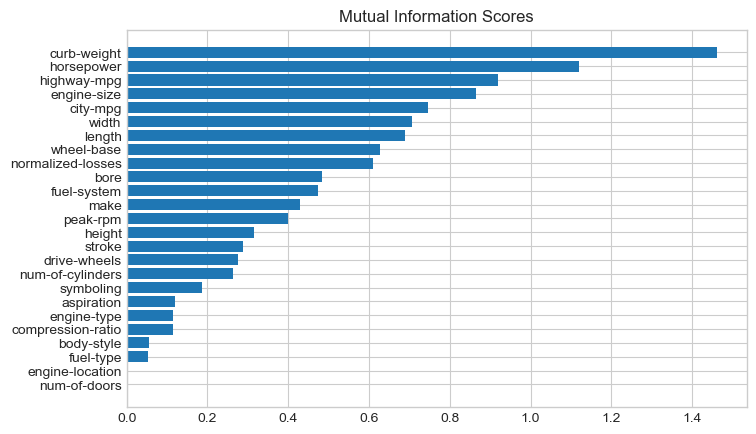

In [23]:
# And now a bar plot to make comparisions easier:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

def plot_utility_scores(scores):
    y = scores.sort_values(ascending=True)
    width = np.arange(len(y))
    ticks = list(y.index)
    plt.barh(width, y)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_utility_scores(mi_scores)

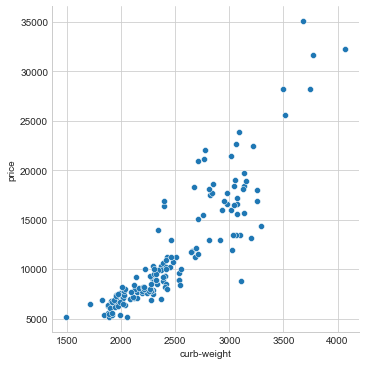

In [33]:
sns.relplot(x="curb-weight", y="price", data=df)

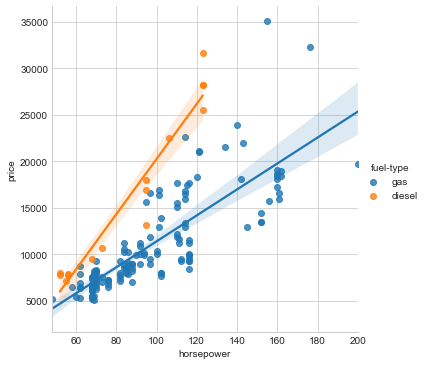

In [35]:
sns.lmplot(x="horsepower", y="price", hue="fuel-type", data=df);